In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import cv2
from IPython.display import display, Markdown, Latex
%matplotlib inline

In [2]:
candidates = pd.read_csv("candidates_V2.csv")
candidates.head()

,seriesuid,coordX,coordY,coordZ,class
0,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,68.420000,-74.480000,-288.700000,0
1,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,-95.209361,-91.809406,-377.426350,0
2,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,-24.766755,-120.379294,-273.361539,0
3,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,-63.080000,-65.740000,-344.240000,0
4,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,52.946688,-92.688873,-241.067872,0


Number of patients = 888

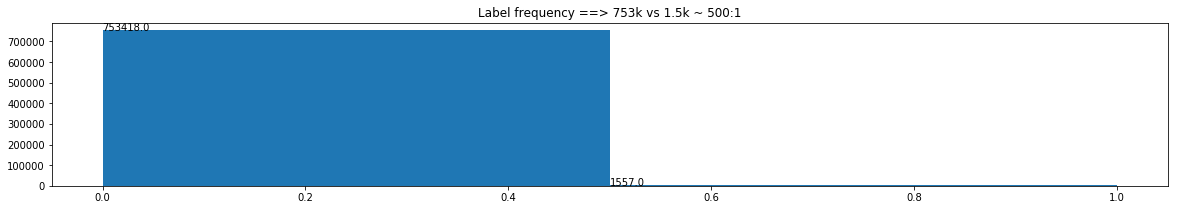

In [84]:
nPatients = len(candidates.seriesuid.unique())
display(Markdown('Number of patients = {0}'.format(nPatients)))
labels = candidates["class"].values
bins = 2
fig = plt.figure(figsize=(20,3))
arr = plt.hist(labels,normed=0,bins=bins);
plt.title("Label frequency ==> 753k vs 1.5k ~ 500:1")
for i in range(bins):
    plt.text(arr[1][i],arr[0][i],str(arr[0][i]))
plt.show()

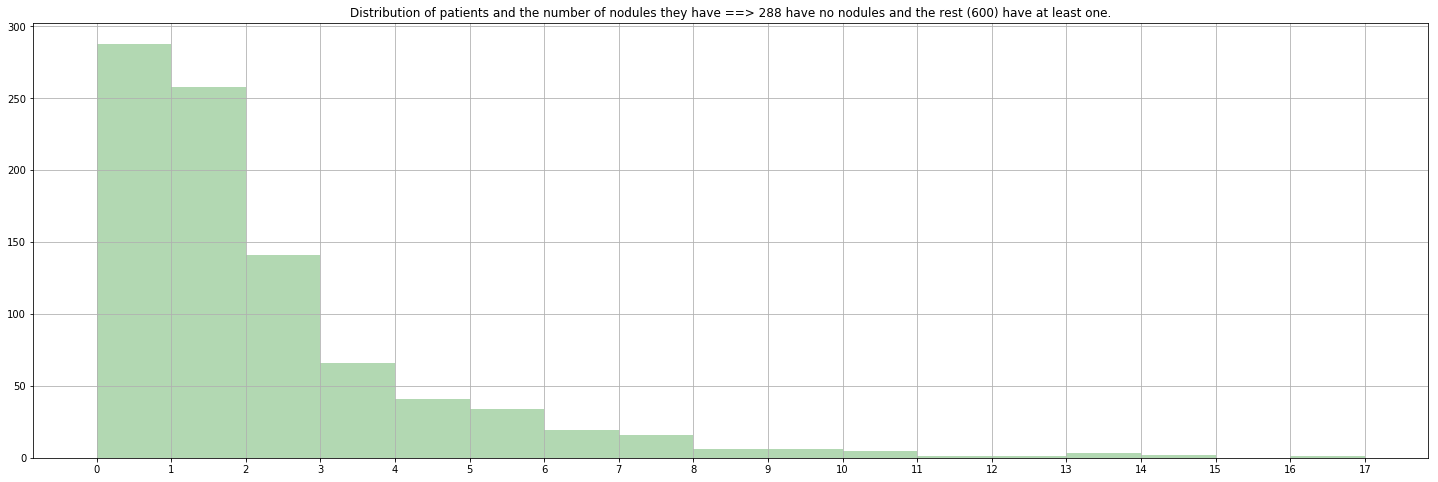

In [83]:
patientNumbers = candidates.groupby("seriesuid")[["class"]].sum()
patientNumbersValues = patientNumbers["class"].values
dontHaveNodules = patientNumbers[patientNumbers["class"]==0].shape[0]
haveNodules = patientNumbers[patientNumbers["class"]!=0].shape[0]
fig = plt.figure(figsize=(25,8))                                                               
ax = fig.add_subplot(1,1,1) 
plt.title("Distribution of patients and the number of nodules they have ==> {0} have no nodules and the rest ({1}) have at least one.".format(dontHaveNodules,haveNodules))
major_ticks = np.arange(0, 20, 1)                                              
minor_ticks = np.arange(0, 20, 1)                                               
ax.set_xticks(major_ticks)                                                       
ax.set_xticks(minor_ticks, minor=True) 
ax.hist(patientNumbersValues,bins=range(min(patientNumbersValues), max(patientNumbersValues) + 1, 1), alpha=0.3,facecolor='green'); plt.grid(True);
plt.show()

In [22]:
annotations = pd.read_csv("annotations.csv")
annotations.head()

,seriesuid,coordX,coordY,coordZ,diameter_mm
0,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,-128.699421,-175.319272,-298.387506,5.651471
1,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,103.783651,-211.925149,-227.121250,4.224708
2,1.3.6.1.4.1.14519.5.2.1.6279.6001.100398138793...,69.639017,-140.944586,876.374496,5.786348
3,1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016...,-24.013824,192.102405,-391.081276,8.143262
4,1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016...,2.441547,172.464881,-405.493732,18.545150
